In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import lapla0cian_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import chi2_kernel
from gensim.models import KeyedVectors

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
DIR = '/content/drive/MyDrive/DATASETS/'
ARTICLES = 'shared_articles.csv'
USERS = 'users_interactions.csv'
GOOGLENEWS = 'GoogleNews-vectors-negative300.bin'
SPECIAL_CHARS = '[^A-Za-z0-9 ]+'

In [ ]:
df_users = pd.read_csv(DIR+USERS)
df_articles = pd.read_csv(DIR+ARTICLES)
df_all = pd.merge(df_users, df_articles, on='contentId', how='inner')

In [ ]:
df_users.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [ ]:
df_articles.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [ ]:
df_all.head()

,timestamp_x,eventType_x,contentId,personId,sessionId,userAgent,userRegion,userCountry,timestamp_y,eventType_y,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
1,1465413046,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
2,1465907360,VIEW,-3499919498720038879,-108842214936804958,-2163423831651021975,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
3,1465583412,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
4,1465582468,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en


In [ ]:
df_all = df_all.drop(['timestamp_y', 'eventType_y'], axis=1)
df_all.columns.values[0] = 'timestamp'
df_all.columns.values[1] = 'eventType'
df_all = df_all[(df_all.lang == 'en') & (df_all.eventType == 'VIEW')].drop_duplicates(['title', 'personId'])

In [ ]:
df_all.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
2,1465907360,VIEW,-3499919498720038879,-108842214936804958,-2163423831651021975,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,SP,BR,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
3,1465583412,VIEW,-3499919498720038879,-1443636648652872475,-3976301106281818872,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
6,1465320576,VIEW,-3499919498720038879,-8020832670974472349,4338004905404464134,NaN,NaN,NaN,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
9,1465392977,VIEW,-3499919498720038879,-9009798162809551896,7335613547264158268,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en


In [ ]:
df_all.head().transpose()

,0,2,3,6,9
timestamp,1465413032,1465907360,1465583412,1465320576,1465392977
eventType,VIEW,VIEW,VIEW,VIEW,VIEW
contentId,-3499919498720038879,-3499919498720038879,-3499919498720038879,-3499919498720038879,-3499919498720038879
personId,-8845298781299428018,-108842214936804958,-1443636648652872475,-8020832670974472349,-9009798162809551896
sessionId,1264196770339959068,-2163423831651021975,-3976301106281818872,4338004905404464134,7335613547264158268
userAgent,NaN,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
userRegion,NaN,SP,SP,NaN,SP
userCountry,NaN,BR,BR,NaN,BR
authorPersonId,-1032019229384696495,-1032019229384696495,-1032019229384696495,-1032019229384696495,-1032019229384696495
authorSessionId,-7696592431575292648,-7696592431575292648,-7696592431575292648,-7696592431575292648,-7696592431575292648


In [ ]:
print('Unique articles: '+str(len(df_all.title.unique())))
print('Unique users: '+str(len(df_all.personId.unique())))
print('Unique User-Article Interactions: '+str(len(df_all)))
print('Average read articles per user: '+str(round(len(df_all)/len(df_all.personId.unique()), 2)))

Unique articles: 2113
Unique users: 1643
Unique User-Article Interactions: 25779
Average read articles per user: 15.69


In [ ]:
df_all.iloc[0].text

"Hiri is the latest startup trying to fix email. Specifically, the Dublin-based company is targeting workplace email with an array of features that aim to nudge users to change their email behaviour for the better. For it isn't email that is necessarily broken but the way we all use and abuse it. Starting with the premise that thoughtless and un-targeted emails fill a very high percentage of your work email inbox, Hiri's headline feature is the ability for recipients to rate each email they receive, which serves as the basis for your own email score or email analytics. You've given a weekly score based on feedback received relating to clarity, brevity, and tone, and the software's rating of your overall email behaviour. The idea, the startup's CEO and co-founder Kevin Kavanagh told me during a call last week, is to get employees thinking about how they currently use email and to begin to change their behaviour for the better. The weekly score also ensures employees don't return to bad 

In [ ]:
def preprocess(text):
    tokenized = [word for sent in [re.sub(SPECIAL_CHARS, '', element).split(' ') for element in nltk.sent_tokenize(text)] for word in sent]
    lowered = [word.lower() for word in tokenized]
    return lowered

In [ ]:
article_texts = [preprocess(text) for text in df_all.text.tolist()]

In [ ]:
article_texts[0][0:50] # snippet (first 25 words) of preprocessed article text

['hiri',
 'is',
 'the',
 'latest',
 'startup',
 'trying',
 'to',
 'fix',
 'email',
 'specifically',
 'the',
 'dublinbased',
 'company',
 'is',
 'targeting',
 'workplace',
 'email',
 'with',
 'an',
 'array',
 'of',
 'features',
 'that',
 'aim',
 'to',
 'nudge',
 'users',
 'to',
 'change',
 'their',
 'email',
 'behaviour',
 'for',
 'the',
 'better',
 'for',
 'it',
 'isnt',
 'email',
 'that',
 'is',
 'necessarily',
 'broken',
 'but',
 'the',
 'way',
 'we',
 'all',
 'use',
 'and']

In [ ]:
title_text = dict(zip(df_all.title.tolist(), article_texts))

In [ ]:
user_title = df_all[['personId', 'title']].groupby('personId')['title'].apply(lambda x: x.tolist()).to_dict()
user_title[list(user_title.keys())[0]][0:25] # snippet of (first 25) titles of articles this user has re

['Google launches Springboard, an AI-powered assistant for its enterprise customers',
 "Here's proof that Google is getting serious about battling Facebook in a key area",
 'An independent organization just ranked Google as the best cloud, beating Amazon',
 "Jury finds Google's implementation of Java in Android was fair use",
 "YouTube's New Messenger Means You'll Never Have to Leave YouTube",
 "No, Apple isn't the next BlackBerry - it's the next Microsoft",
 "A digital crack in banking's business model",
 'Inbox by Gmail: a better way to keep track of events, newsletters and links',
 "5 awesome Google Keep features you aren't using, but should be",
 "Google's fair use victory is good for open source",
 "Why It's Time to Take Google's PC Operating System Seriously",
 "Latin America's chronic inefficiency could drive more O2O commerce growth",
 'Changing change management',
 'Organizing for digital acceleration: Making a two-speed IT operating model work',
 'Exclusive: Why Microsoft is 

In [ ]:
w2v = KeyedVectors.load_word2vec_format(DIR+GOOGLENEWS, binary=True)

In [ ]:
def get_vectors(first_map, second_map):
    first_vec  = dict()
    for uid, content in first_map.items():
        temp = list()
        for element in content:
            try:
                temp.append(second_map[element])
            except KeyError:
                pass
        first_vec[uid] = np.mean(temp, axis=0)
    
    return first_vec

In [ ]:
title_vec = get_vectors(title_text, w2v)
user_vec = get_vectors(user_title, title_vec)

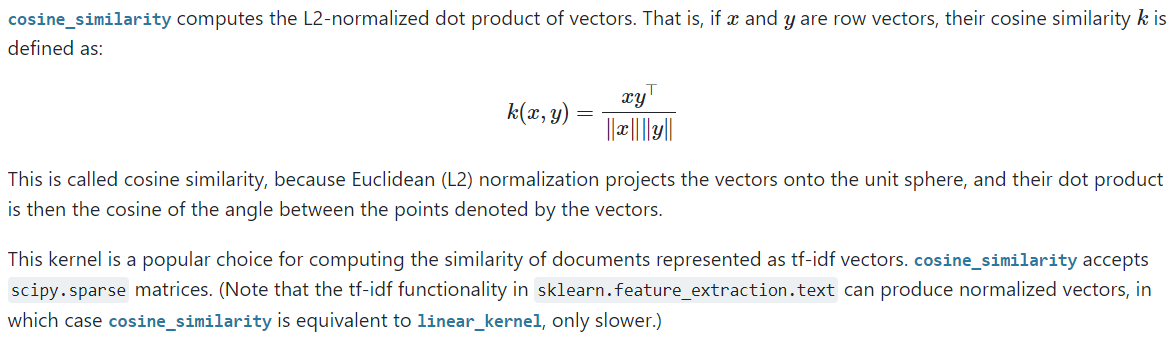

In [ ]:
#cosine similarity
def get_most_similar(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = cosine_similarity(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

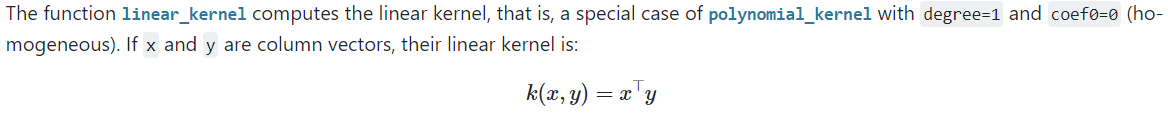

In [ ]:
#linear kernel
def get_most_similar1(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = linear_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

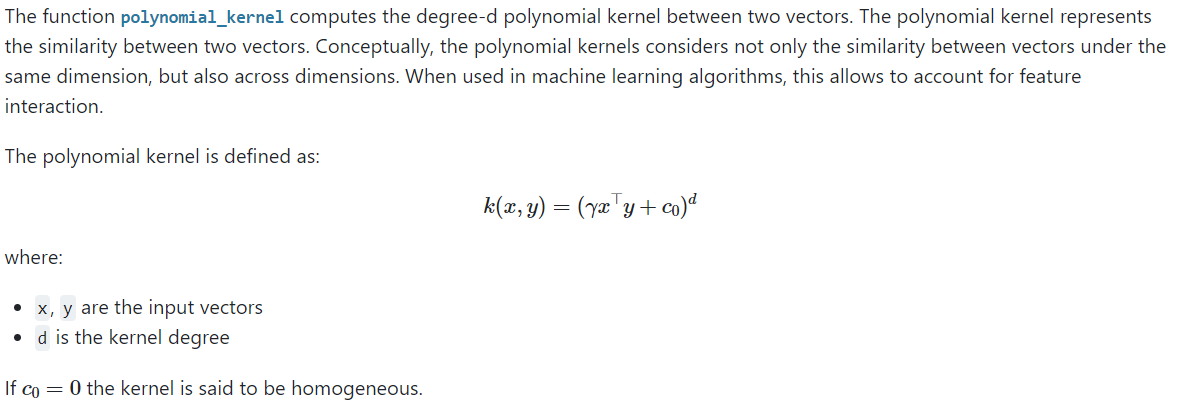

In [ ]:
#polynomial kernel
def get_most_similar2(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = polynomial_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

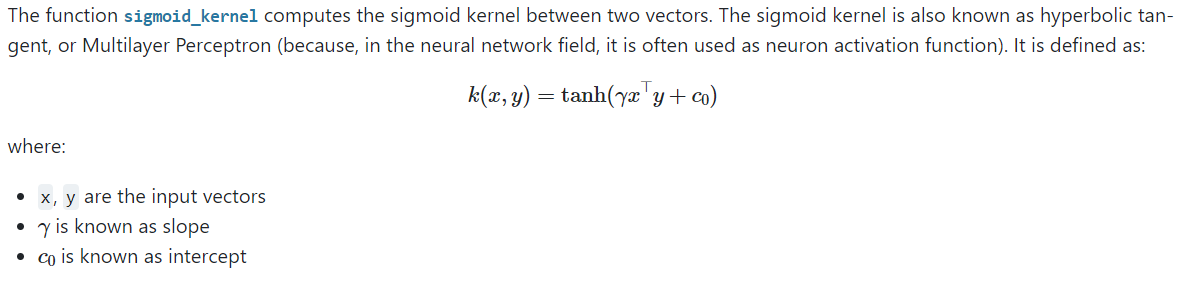

In [ ]:
#sigmoid kernel
def get_most_similar3(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = sigmoid_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

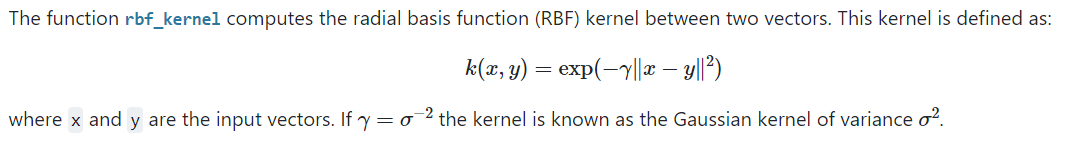

In [ ]:
#RBF(Radial Basis Function) kernel
def get_most_similar4(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = rbf_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

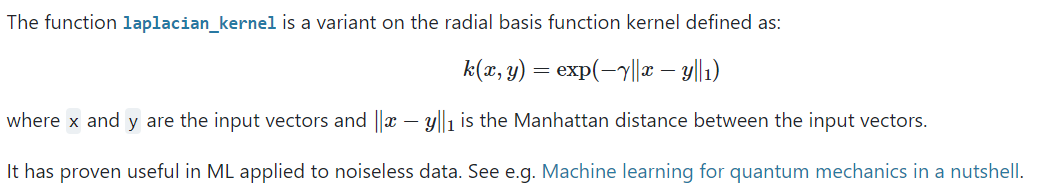

In [ ]:
#Laplacian kernel
def get_most_similar5(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = laplacian_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

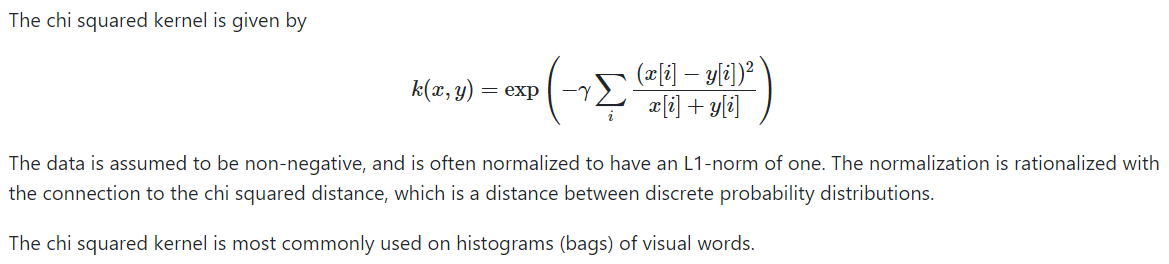

In [ ]:
#Chi Squared kernel
def get_most_similar6(kind, lookup_id, title_vec, user_vec):

    sim = list()
    
    if kind == 'user-to-user':
        lookup_map = user_vec
        subject_map = user_vec
    elif kind == 'item-to-item':
        lookup_map = title_vec
        subject_map = title_vec
    elif kind == 'item-to-user':
        lookup_map = title_vec
        subject_map = user_vec  
    else:
        raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = chi2_kernel(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

In [ ]:
USERID = 6999578934585823267

In [ ]:
user_vec[USERID]

array([ 3.83934267e-02,  1.98046025e-02,  2.60677598e-02,  9.71757025e-02,
       -7.60422423e-02,  6.02996768e-03,  4.85960580e-02, -6.15817048e-02,
        6.00746796e-02,  5.77321127e-02, -5.76591380e-02, -9.08971652e-02,
       -1.36822267e-02,  1.34798186e-02, -8.96785259e-02,  4.95006144e-02,
        3.62423249e-02,  8.74650106e-02, -2.45557330e-03, -6.45062253e-02,
       -2.10532267e-02,  3.12669389e-02, -2.01373361e-02,  7.64014665e-03,
        2.77771689e-02, -7.71125313e-03, -6.85492456e-02,  7.08504692e-02,
        1.18770516e-02, -1.05868597e-02, -2.92205680e-02, -2.96129496e-03,
       -2.78729741e-02, -7.68278632e-03,  9.78257321e-03, -1.75303388e-02,
        8.85547779e-04, -1.31769879e-02,  6.11851998e-02,  3.77062038e-02,
        8.54908973e-02, -1.30251572e-02,  7.79474974e-02,  2.06085276e-02,
       -9.38826799e-03, -4.42517810e-02, -3.02563570e-02,  1.26006836e-02,
        1.24958558e-02,  7.89072737e-03,  4.25554533e-03,  1.83089841e-02,
       -2.89376397e-02, -

In [ ]:
user_title[USERID]

['Anti-If: The missing patterns',
 "Beyond Progressive Web Apps Part 2: We Need to Know What's New",
 'Prototypal Object-Oriented Programming using JavaScript',
 "Watch Google's AI master the infamously difficult Atari game Montezuma's Revenge",
 'Wide & Deep Learning: Better Together with TensorFlow',
 'Announcing .NET Core 1.0',
 'Deep Learning for Chatbots, Part 1 - Introduction']

In [ ]:
all_similar_users = get_most_similar('user-to-user', USERID, title_vec, user_vec)
all_similar_users[1:51]

[(8874741321583329336, 0.995747),
 (1163668879480930452, 0.9944429),
 (-8399605302938582500, 0.9943939),
 (2551221442168658664, 0.9943802),
 (1317292353478724560, 0.99432695),
 (-7267769888748948232, 0.9943174),
 (-2979881261169775358, 0.9942807),
 (-6188912942004687815, 0.9941869),
 (670878778036881163, 0.99407494),
 (2290322765105220968, 0.99406403),
 (8164031568920151381, 0.99400324),
 (9013651444868609421, 0.9939683),
 (-4355190001103094206, 0.99380434),
 (434517017614495946, 0.9937815),
 (9148269800512008413, 0.9937613),
 (5127372011815639401, 0.99362445),
 (-7656701953949775820, 0.9935386),
 (1493119272824026132, 0.9934707),
 (-5157376071499052964, 0.9934676),
 (3649923015832992113, 0.9934368),
 (1097401149118884075, 0.9934327),
 (4794949202379942794, 0.9934248),
 (-4125205337625989832, 0.99341905),
 (3061273947166110301, 0.99341786),
 (-6878112296616605612, 0.9934075),
 (-1257176162426022931, 0.9933833),
 (-8243020848740766897, 0.9933184),
 (4313045637915476309, 0.9932628),
 (-1

In [ ]:
all_similar_users1 = get_most_similar1('user-to-user', USERID, title_vec, user_vec)
all_similar_users1[1:51]

[(-7920036110689552764, 0.6649041),
 (-5573063483172708129, 0.6649041),
 (-4432034906943587380, 0.6649041),
 (1017339174977034774, 0.6649041),
 (3985253218546481406, 0.6649041),
 (4699206643216946639, 0.6649041),
 (7911347399014555575, 0.6649041),
 (607460302441631358, 0.66283673),
 (2047954150900722645, 0.6625839),
 (-7815718986451468962, 0.66162914),
 (54023883492884059, 0.66111904),
 (-2972186460377920790, 0.6601454),
 (-7644859828368354114, 0.65991074),
 (-7001639577646477211, 0.65991074),
 (4223428278618203229, 0.659282),
 (-241759414021954035, 0.6589717),
 (4272924174028141645, 0.6589717),
 (-6150302542037419158, 0.6520467),
 (2612012348742830907, 0.651085),
 (-5643862669441284349, 0.65095586),
 (3789334872668436357, 0.65095586),
 (-316126625721320125, 0.6499724),
 (-2594582613482026982, 0.6497653),
 (5647081278813804891, 0.6497653),
 (5784739374876308856, 0.64896667),
 (4658758950701852804, 0.64809453),
 (115141794465366279, 0.6474868),
 (267292780203427074, 0.6463225),
 (235617

In [ ]:
all_similar_users2 = get_most_similar2('user-to-user', USERID, title_vec, user_vec)
all_similar_users2[1:51]

[(-7920036110689552764, 1.0066638),
 (-5573063483172708129, 1.0066638),
 (-4432034906943587380, 1.0066638),
 (1017339174977034774, 1.0066638),
 (3985253218546481406, 1.0066638),
 (4699206643216946639, 1.0066638),
 (7911347399014555575, 1.0066638),
 (607460302441631358, 1.0066429),
 (2047954150900722645, 1.0066404),
 (-7815718986451468962, 1.0066307),
 (54023883492884059, 1.0066257),
 (-2972186460377920790, 1.006616),
 (-7644859828368354114, 1.0066135),
 (-7001639577646477211, 1.0066135),
 (4223428278618203229, 1.0066074),
 (-241759414021954035, 1.0066042),
 (4272924174028141645, 1.0066042),
 (-6150302542037419158, 1.0065348),
 (2612012348742830907, 1.0065252),
 (-5643862669441284349, 1.0065237),
 (3789334872668436357, 1.0065237),
 (-316126625721320125, 1.006514),
 (-2594582613482026982, 1.0065118),
 (5647081278813804891, 1.0065118),
 (5784739374876308856, 1.0065036),
 (4658758950701852804, 1.006495),
 (115141794465366279, 1.0064888),
 (267292780203427074, 1.006477),
 (23561703040647625

In [ ]:
all_similar_users3 = get_most_similar3('user-to-user', USERID, title_vec, user_vec)
all_similar_users3[1:51]

[(-7920036110689552764, 0.7625234),
 (-5573063483172708129, 0.7625234),
 (-4432034906943587380, 0.7625234),
 (1017339174977034774, 0.7625234),
 (3985253218546481406, 0.7625234),
 (4699206643216946639, 0.7625234),
 (7911347399014555575, 0.7625234),
 (607460302441631358, 0.7625205),
 (2047954150900722645, 0.76252013),
 (-7815718986451468962, 0.7625188),
 (54023883492884059, 0.7625181),
 (-2972186460377920790, 0.76251674),
 (-7644859828368354114, 0.7625164),
 (-7001639577646477211, 0.7625164),
 (4223428278618203229, 0.76251554),
 (-241759414021954035, 0.7625151),
 (4272924174028141645, 0.7625151),
 (-6150302542037419158, 0.76250553),
 (2612012348742830907, 0.7625041),
 (-5643862669441284349, 0.7625039),
 (3789334872668436357, 0.7625039),
 (-316126625721320125, 0.7625026),
 (-2594582613482026982, 0.76250225),
 (5647081278813804891, 0.76250225),
 (5784739374876308856, 0.7625011),
 (4658758950701852804, 0.7624999),
 (115141794465366279, 0.7624991),
 (267292780203427074, 0.7624974),
 (2356170

In [ ]:
all_similar_users4 = get_most_similar4('user-to-user', USERID, title_vec, user_vec)
all_similar_users4[1:51]

[(8874741321583329336, 0.99998254),
 (1163668879480930452, 0.99997723),
 (-8399605302938582500, 0.99997705),
 (2551221442168658664, 0.9999769),
 (-7267769888748948232, 0.9999766),
 (-2979881261169775358, 0.9999765),
 (1317292353478724560, 0.99997616),
 (-6188912942004687815, 0.9999761),
 (670878778036881163, 0.99997574),
 (2290322765105220968, 0.9999757),
 (9013651444868609421, 0.9999747),
 (-4355190001103094206, 0.9999745),
 (434517017614495946, 0.9999745),
 (8164031568920151381, 0.9999745),
 (9148269800512008413, 0.9999745),
 (5127372011815639401, 0.99997395),
 (-7656701953949775820, 0.9999735),
 (-5157376071499052964, 0.9999732),
 (-4125205337625989832, 0.9999731),
 (1493119272824026132, 0.9999731),
 (-6878112296616605612, 0.99997306),
 (3649923015832992113, 0.99997306),
 (3061273947166110301, 0.999973),
 (-1257176162426022931, 0.99997294),
 (1097401149118884075, 0.99997294),
 (4794949202379942794, 0.99997276),
 (-8243020848740766897, 0.9999727),
 (4313045637915476309, 0.9999725),
 

In [ ]:
all_similar_users5 = get_most_similar5('user-to-user', USERID, title_vec, user_vec)
all_similar_users5[1:51]

[(8874741321583329336, 0.9967012328828907),
 (2551221442168658664, 0.9962300776254543),
 (-8399605302938582500, 0.9961964235866427),
 (1317292353478724560, 0.9961591734019927),
 (1163668879480930452, 0.9961376628386261),
 (-2979881261169775358, 0.996135640981638),
 (-7267769888748948232, 0.9961053100823019),
 (-6188912942004687815, 0.9960857653046842),
 (670878778036881163, 0.9960804962021041),
 (2290322765105220968, 0.9960261034071644),
 (434517017614495946, 0.9959618307908491),
 (-7656701953949775820, 0.9959331068984106),
 (3061273947166110301, 0.9959325966295411),
 (8164031568920151381, 0.9959311666138022),
 (9013651444868609421, 0.9959264833015367),
 (-1257176162426022931, 0.995901506798157),
 (9148269800512008413, 0.9958836560801123),
 (-5157376071499052964, 0.9958788324570714),
 (-4355190001103094206, 0.9958772061742283),
 (4794949202379942794, 0.9958668318946505),
 (5127372011815639401, 0.9958560349530449),
 (-3325508780389598615, 0.9958332826331687),
 (-4125205337625989832, 0.9

In [ ]:
best_id = all_similar_users[1][0]

In [ ]:
best_id1 = all_similar_users1[1][0]

In [ ]:
best_id2 = all_similar_users2[1][0]

In [ ]:
best_id3 = all_similar_users3[1][0]

In [ ]:
best_id4 = all_similar_users4[1][0]

In [ ]:
best_id5 = all_similar_users5[1][0]

In [ ]:
user_title[best_id]

['rasbt/python-machine-learning-book',
 'Anti-If: The missing patterns',
 'How will bots make money? Here are 7 business models',
 'Java 8 Best Practices Cheat Sheet',
 'Python Ecosystem for Machine Learning - Machine Learning Mastery',
 'When will AI and NLP actually turn Siri into your best friend?',
 "Watch Google's AI master the infamously difficult Atari game Montezuma's Revenge",
 'Bitcoin Mining, Ethereum Mining, Cloud Mining: 2016 Overview',
 'TPOT: A Python tool for automating data science',
 'The Netflix Tech Blog: Netflix Billing Migration to AWS',
 'Machine Learning is Fun! Part 2',
 'Hello, TensorFlow!',
 'Machine Learning is Fun!',
 'My Top 9 Favorite Python Deep Learning Libraries - PyImageSearch',
 "The Developer's Midlife Crisis: What's Next?",
 'The brilliant mechanics of Pokémon Go',
 'Tabs vs Spaces: How They Write Java at Google, Twitter, Mozilla and Pied Piper | Takipi Blog',
 '10 Modern Software Over-Engineering Mistakes',
 'Serious Business: Should Renewable Ene

In [ ]:
user_title[best_id1]

["Don't document your code. Code your documentation."]

In [ ]:
user_title[best_id2]

["Don't document your code. Code your documentation."]

In [ ]:
user_title[best_id3]

["Don't document your code. Code your documentation."]

In [ ]:
user_title[best_id4]

['rasbt/python-machine-learning-book',
 'Anti-If: The missing patterns',
 'How will bots make money? Here are 7 business models',
 'Java 8 Best Practices Cheat Sheet',
 'Python Ecosystem for Machine Learning - Machine Learning Mastery',
 'When will AI and NLP actually turn Siri into your best friend?',
 "Watch Google's AI master the infamously difficult Atari game Montezuma's Revenge",
 'Bitcoin Mining, Ethereum Mining, Cloud Mining: 2016 Overview',
 'TPOT: A Python tool for automating data science',
 'The Netflix Tech Blog: Netflix Billing Migration to AWS',
 'Machine Learning is Fun! Part 2',
 'Hello, TensorFlow!',
 'Machine Learning is Fun!',
 'My Top 9 Favorite Python Deep Learning Libraries - PyImageSearch',
 "The Developer's Midlife Crisis: What's Next?",
 'The brilliant mechanics of Pokémon Go',
 'Tabs vs Spaces: How They Write Java at Google, Twitter, Mozilla and Pied Piper | Takipi Blog',
 '10 Modern Software Over-Engineering Mistakes',
 'Serious Business: Should Renewable Ene

In [ ]:
user_title[best_id5]

['rasbt/python-machine-learning-book',
 'Anti-If: The missing patterns',
 'How will bots make money? Here are 7 business models',
 'Java 8 Best Practices Cheat Sheet',
 'Python Ecosystem for Machine Learning - Machine Learning Mastery',
 'When will AI and NLP actually turn Siri into your best friend?',
 "Watch Google's AI master the infamously difficult Atari game Montezuma's Revenge",
 'Bitcoin Mining, Ethereum Mining, Cloud Mining: 2016 Overview',
 'TPOT: A Python tool for automating data science',
 'The Netflix Tech Blog: Netflix Billing Migration to AWS',
 'Machine Learning is Fun! Part 2',
 'Hello, TensorFlow!',
 'Machine Learning is Fun!',
 'My Top 9 Favorite Python Deep Learning Libraries - PyImageSearch',
 "The Developer's Midlife Crisis: What's Next?",
 'The brilliant mechanics of Pokémon Go',
 'Tabs vs Spaces: How They Write Java at Google, Twitter, Mozilla and Pied Piper | Takipi Blog',
 '10 Modern Software Over-Engineering Mistakes',
 'Serious Business: Should Renewable Ene

In [ ]:
USERID = 6999578934585823267

In [ ]:
all_similar_items = get_most_similar('item-to-user', USERID, title_vec, user_vec)
all_similar_items[0:30]

[("SyntaxNet in context: Understanding Google's new TensorFlow NLP model | Blog",
  0.98688674),
 ('10 Modern Software Over-Engineering Mistakes', 0.98634607),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all',
  0.98478234),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all - Confluent',
  0.98478234),
 ('Machine Learning is Fun! Part 2', 0.9847719),
 ('Beyond Progressive Web Apps Part 1', 0.9846207),
 ('Rails vs Django: an in-depth technical comparison', 0.98452795),
 ('Hello, TensorFlow!', 0.9842616),
 ('Notes on Reactive Programming Part I: The Reactive Landscape', 0.98320675),
 ('Prototypal Object-Oriented Programming using JavaScript', 0.9832039),
 ('Scala is the new golden child', 0.9829433),
 ('Meet Articoolo, the robot writer with content for brains', 0.98291034),
 ('The Art Of Layout Testing With Galen Framework - Smashing Magazine',
  0.9827929),
 ('Microservices: Real Architectural Patterns', 0.98252404),
 ('I

In [ ]:
all_similar_items1 = get_most_similar1('item-to-user', USERID, title_vec, user_vec)
all_similar_items1[0:30]

[('9 Useful Apps for Product Managers - Product Hunt', 0.6965688),
 ('360 million reasons to destroy all passwords - Free Code Camp', 0.6944392),
 ('MacOS Sierra Preview', 0.69305015),
 ('Enable secure mode on your web product | Intercom Docs', 0.6892545),
 ('Sponsored: Five reasons why retailers should opt for digital receipts',
  0.6865531),
 ('A Harvard Psychologist Says This Trait Matters Most: 10 Ways to Make a Great First Impression',
  0.6836026),
 ('Say Hello to React CDK - KADIRA VOICE', 0.68324363),
 ('These 17 life hacks will change the way you use Gmail', 0.67472434),
 ("Up your app's sharing game with DirectShare - Google Developers",
  0.67237777),
 ('How to E-Mail a Busy Person & get a Reply - Desk of van Schneider',
  0.6723597),
 ('7 Powerful Habits That Make You More Assertive', 0.6716702),
 ('Joel on Software', 0.6713694),
 ('One weird trick that will change the way you code forever: JavaScript TDD',
  0.66893566),
 ('How to Design a Walkthrough That Users Will Read'

In [ ]:
all_similar_items2 = get_most_similar2('item-to-user', USERID, title_vec, user_vec)
all_similar_items2[0:30]

[('9 Useful Apps for Product Managers - Product Hunt', 1.0069817),
 ('360 million reasons to destroy all passwords - Free Code Camp', 1.0069605),
 ('MacOS Sierra Preview', 1.0069464),
 ('Enable secure mode on your web product | Intercom Docs', 1.0069084),
 ('Sponsored: Five reasons why retailers should opt for digital receipts',
  1.0068811),
 ('A Harvard Psychologist Says This Trait Matters Most: 10 Ways to Make a Great First Impression',
  1.0068517),
 ('Say Hello to React CDK - KADIRA VOICE', 1.0068481),
 ('These 17 life hacks will change the way you use Gmail', 1.0067625),
 ("Up your app's sharing game with DirectShare - Google Developers",
  1.0067389),
 ('How to E-Mail a Busy Person & get a Reply - Desk of van Schneider',
  1.0067389),
 ('7 Powerful Habits That Make You More Assertive', 1.0067316),
 ('Joel on Software', 1.0067288),
 ('One weird trick that will change the way you code forever: JavaScript TDD',
  1.0067043),
 ('How to Design a Walkthrough That Users Will Read', 1.0

In [ ]:
all_similar_items3 = get_most_similar3('item-to-user', USERID, title_vec, user_vec)
all_similar_items3[0:30]

[('9 Useful Apps for Product Managers - Product Hunt', 0.7625675),
 ('360 million reasons to destroy all passwords - Free Code Camp', 0.7625646),
 ('MacOS Sierra Preview', 0.76256263),
 ('Enable secure mode on your web product | Intercom Docs', 0.7625574),
 ('Sponsored: Five reasons why retailers should opt for digital receipts',
  0.7625536),
 ('A Harvard Psychologist Says This Trait Matters Most: 10 Ways to Make a Great First Impression',
  0.7625495),
 ('Say Hello to React CDK - KADIRA VOICE', 0.762549),
 ('These 17 life hacks will change the way you use Gmail', 0.7625371),
 ("Up your app's sharing game with DirectShare - Google Developers",
  0.7625338),
 ('How to E-Mail a Busy Person & get a Reply - Desk of van Schneider',
  0.7625338),
 ('7 Powerful Habits That Make You More Assertive', 0.76253283),
 ('Joel on Software', 0.7625325),
 ('One weird trick that will change the way you code forever: JavaScript TDD',
  0.762529),
 ('How to Design a Walkthrough That Users Will Read', 0.7

In [ ]:
all_similar_items4 = get_most_similar4('item-to-user', USERID, title_vec, user_vec)
all_similar_items4[0:30]

[("SyntaxNet in context: Understanding Google's new TensorFlow NLP model | Blog",
  0.99994135),
 ('10 Modern Software Over-Engineering Mistakes', 0.99993867),
 ('Rails vs Django: an in-depth technical comparison', 0.99993664),
 ('Machine Learning is Fun! Part 2', 0.9999313),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all',
  0.99993116),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all - Confluent',
  0.99993116),
 ('Scala is the new golden child', 0.99993056),
 ('Notes on Reactive Programming Part I: The Reactive Landscape', 0.99992967),
 ('Meet Articoolo, the robot writer with content for brains', 0.9999294),
 ('Hello, TensorFlow!', 0.999929),
 ('Prototypal Object-Oriented Programming using JavaScript', 0.9999286),
 ('Beyond Progressive Web Apps Part 1', 0.9999275),
 ('An Exclusive Look at How AI and Machine Learning Work at Apple - Backchannel',
  0.99992657),
 ('Inversion of Control Containers and the Dependency I

In [ ]:
all_similar_items5 = get_most_similar5('item-to-user', USERID, title_vec, user_vec)
all_similar_items5[0:30]

[("SyntaxNet in context: Understanding Google's new TensorFlow NLP model | Blog",
  0.9939548692850294),
 ('10 Modern Software Over-Engineering Mistakes', 0.9936664164874772),
 ('Rails vs Django: an in-depth technical comparison', 0.9935491969954081),
 ('Scala is the new golden child', 0.9934616374450015),
 ('Machine Learning is Fun! Part 2', 0.9934559075845074),
 ('Notes on Reactive Programming Part I: The Reactive Landscape',
  0.9933093687387398),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all',
  0.9932797201724178),
 ('Stream processing, Event sourcing, Reactive, CEP... and making sense of it all - Confluent',
  0.9932797201724178),
 ('Hello, TensorFlow!', 0.9932580983443295),
 ('Prototypal Object-Oriented Programming using JavaScript',
  0.9932362324480606),
 ('Beyond Progressive Web Apps Part 1', 0.9932281250025389),
 ('Meet Articoolo, the robot writer with content for brains',
  0.9931965939916262),
 ('An Exclusive Look at How AI and Machine L

In [ ]:
ITEMID = 'Wall Street Goes Big on Bitcoin Tech'

In [ ]:
all_similar_item_to_item = get_most_similar('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item[1:101]

[('JPMorgan Software Does in Seconds What Took Lawyers 360,000 Hours',
  0.9351428),
 ('The Rise And Growth of Ethereum Gets Mainstream Coverage', 0.9345241),
 ('How This Former Google Engineer Is Bringing Blockchain to Banks',
  0.92934185),
 ('The New Wall Street: Even Big Banks Want Help Navigating Markets',
  0.9291453),
 ("Inside Palantir, Silicon Valley's Most Secretive Company", 0.92848915),
 ("Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
  0.9273318),
 ('Blockchain startup R3 cuts fund-raising target to $150 million: source',
  0.9253291),
 ("Lady Gaga's startup Backplane burns out and sells assets", 0.92435193),
 ("Blockchain won't kill banks: Bitcoin pioneer", 0.92267245),
 ('Confirmed: Walmart buys Jet.com for $3B in cash', 0.9220525),
 ('Digital banking: Mondo hopes to become the Google or Facebook of the sector',
  0.9205023),
 ('The return of the machinery question', 0.9201056),
 ("Intel Reveals Its Plan For Blockchain Technology With 'Sawtoot

In [ ]:
all_similar_item_to_item1 = get_most_similar1('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item1[1:101]

[('3 Industries That Will Be Transformed By AI, Machine Learning And Big Data In The Next Decade',
  0.5404194),
 ('Agility in the Cloud: Which "As a Service" Works for You?', 0.53272414),
 ('Amazon looking to buy Capital One? " Banking Technology', 0.53225416),
 ('Welcome to GoogleBank, Facebook Bank, Amazon Bank, and Apple Bank - Enrique Dans',
  0.5315811),
 ('Bitcoin In The Time Of Negative Interest Rates', 0.531387),
 ('360 million reasons to destroy all passwords - Free Code Camp', 0.53134704),
 ("Nintendo has doubled in value since Pokémon Go's release", 0.53107935),
 ("Google's Cloud Investments are Finally Starting to Pay Off", 0.53072464),
 ('Don Tapscott: How the blockchain is changing money and business',
  0.5304037),
 ('How To Benefit From Getting Paid in Bitcoin', 0.53002155),
 ('How Did Q1 2016 Go for FinTech Around the World?', 0.5296495),
 ('ASIAN INNOVATION FRENZY | New Asia Trend Briefing from TrendWatching',
  0.52915543),
 ('Building a Modern Bank Backend', 0.5285

In [ ]:
all_similar_item_to_item2 = get_most_similar2('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item2[1:101]

[('3 Industries That Will Be Transformed By AI, Machine Learning And Big Data In The Next Decade',
  1.0054139),
 ('Agility in the Cloud: Which "As a Service" Works for You?', 1.0053366),
 ('Amazon looking to buy Capital One? " Banking Technology', 1.005332),
 ('Welcome to GoogleBank, Facebook Bank, Amazon Bank, and Apple Bank - Enrique Dans',
  1.0053252),
 ('Bitcoin In The Time Of Negative Interest Rates', 1.0053234),
 ('360 million reasons to destroy all passwords - Free Code Camp', 1.005323),
 ("Nintendo has doubled in value since Pokémon Go's release", 1.0053202),
 ("Google's Cloud Investments are Finally Starting to Pay Off", 1.0053166),
 ('Don Tapscott: How the blockchain is changing money and business',
  1.0053134),
 ('How To Benefit From Getting Paid in Bitcoin', 1.0053095),
 ('How Did Q1 2016 Go for FinTech Around the World?', 1.0053058),
 ('ASIAN INNOVATION FRENZY | New Asia Trend Briefing from TrendWatching',
  1.0053008),
 ('Building a Modern Bank Backend', 1.0052947),
 (

In [ ]:
all_similar_item_to_item3 = get_most_similar3('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item3[1:101]

[('3 Industries That Will Be Transformed By AI, Machine Learning And Big Data In The Next Decade',
  0.7623496),
 ('Agility in the Cloud: Which "As a Service" Works for You?', 0.7623389),
 ('Amazon looking to buy Capital One? " Banking Technology', 0.7623383),
 ('Welcome to GoogleBank, Facebook Bank, Amazon Bank, and Apple Bank - Enrique Dans',
  0.7623373),
 ('Bitcoin In The Time Of Negative Interest Rates', 0.7623371),
 ('360 million reasons to destroy all passwords - Free Code Camp', 0.762337),
 ("Nintendo has doubled in value since Pokémon Go's release", 0.7623366),
 ("Google's Cloud Investments are Finally Starting to Pay Off", 0.76233613),
 ('Don Tapscott: How the blockchain is changing money and business',
  0.76233566),
 ('How To Benefit From Getting Paid in Bitcoin', 0.7623351),
 ('How Did Q1 2016 Go for FinTech Around the World?', 0.7623346),
 ('ASIAN INNOVATION FRENZY | New Asia Trend Briefing from TrendWatching',
  0.7623339),
 ('Building a Modern Bank Backend', 0.7623331),

In [ ]:
all_similar_item_to_item4 = get_most_similar4('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item4[1:101]

[('The Rise And Growth of Ethereum Gets Mainstream Coverage', 0.9997613),
 ('JPMorgan Software Does in Seconds What Took Lawyers 360,000 Hours',
  0.9997612),
 ("Inside Palantir, Silicon Valley's Most Secretive Company", 0.99974483),
 ('How This Former Google Engineer Is Bringing Blockchain to Banks',
  0.99973404),
 ('The New Wall Street: Even Big Banks Want Help Navigating Markets',
  0.9997335),
 ("Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
  0.99973255),
 ('Blockchain startup R3 cuts fund-raising target to $150 million: source',
  0.99972963),
 ("Lady Gaga's startup Backplane burns out and sells assets", 0.9997214),
 ('The return of the machinery question', 0.9997134),
 ("Blockchain won't kill banks: Bitcoin pioneer", 0.9997127),
 ('Digital banking: Mondo hopes to become the Google or Facebook of the sector',
  0.9997067),
 ('Confirmed: Walmart buys Jet.com for $3B in cash', 0.9997058),
 ("Intel Reveals Its Plan For Blockchain Technology With 'Sawtoot

In [ ]:
all_similar_item_to_item5 = get_most_similar5('item-to-item', ITEMID, title_vec, user_vec)
all_similar_item_to_item5[1:101]

[('The Rise And Growth of Ethereum Gets Mainstream Coverage',
  0.9878885060994318),
 ('JPMorgan Software Does in Seconds What Took Lawyers 360,000 Hours',
  0.9874751163011248),
 ("Inside Palantir, Silicon Valley's Most Secretive Company",
  0.9873897141324105),
 ('The New Wall Street: Even Big Banks Want Help Navigating Markets',
  0.9872216558833316),
 ("Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
  0.9871705873685),
 ('How This Former Google Engineer Is Bringing Blockchain to Banks',
  0.9870720013803822),
 ('Blockchain startup R3 cuts fund-raising target to $150 million: source',
  0.987001177156783),
 ("Blockchain won't kill banks: Bitcoin pioneer", 0.9867153543524899),
 ('The return of the machinery question', 0.9866947917976658),
 ('Confirmed: Walmart buys Jet.com for $3B in cash', 0.9866318182908234),
 ("Lady Gaga's startup Backplane burns out and sells assets",
  0.9865926939842093),
 ("Intel Reveals Its Plan For Blockchain Technology With 'Sawto

In [ ]:
def tsne_plot(mapping, highlight):
    
    values = np.asarray(list(mapping.values()))
    labels = list(mapping.keys())
    
    tsne = TSNE(n_components=2, random_state=1)
    new_values = tsne.fit_transform(values)
    
    x, y = [], []
    
    for item in new_values:
        x.append(item[0])
        y.append(item[1])
    
    plt.figure(figsize=(20, 20))
    for ix, _ in enumerate(x):
        if isinstance(labels[ix], int) or isinstance(labels[ix], np.int64):
            color = 'blue'
            alpha = 0.3
        else:
            if highlight.lower() in title_text[labels[ix]]:
                color = 'green'
                alpha = 1.0
            else:
                color = 'red'
                alpha = 0.3
        plt.scatter(x[ix], y[ix], color=color, alpha=alpha)
        
    red_patch = mpatches.Patch(color='red', label='articles')
    blue_patch = mpatches.Patch(color='blue', label='users')
    green_patch = mpatches.Patch(color='green', label='articles about '+str(highlight))
    plt.legend(handles=[red_patch, blue_patch, green_patch], fontsize=16)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


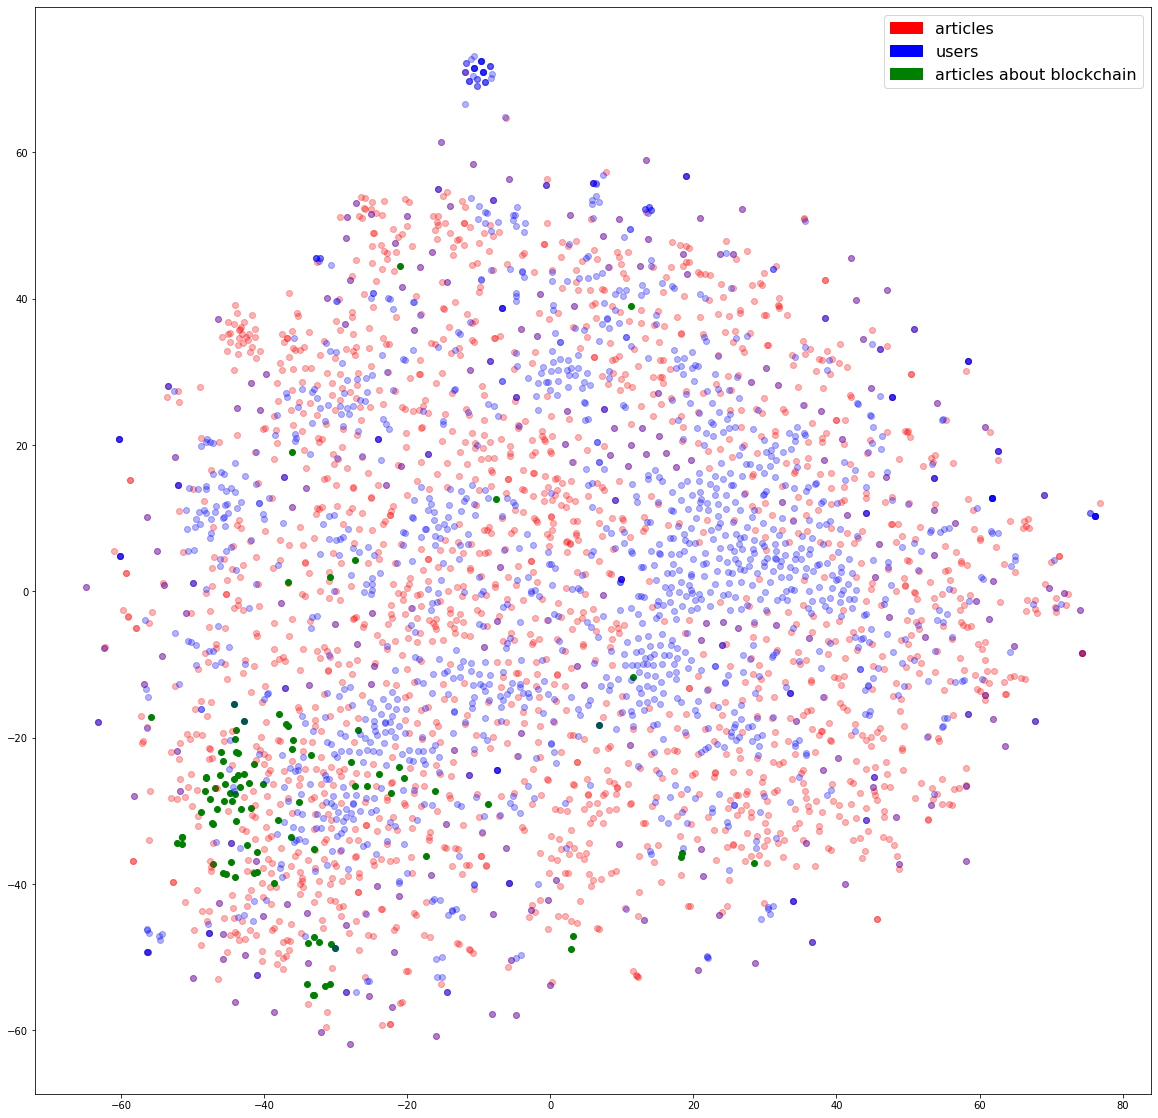

In [ ]:
tsne_plot({**title_vec, **user_vec}, 'blockchain')